In [50]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
IMG = "../data/GeoVision dataset/well_5_0.jpg"

In [52]:
img = cv2.imread(IMG)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
cv2.imwrite("../data/well5gray.png", img)

(10431, 2337)


True

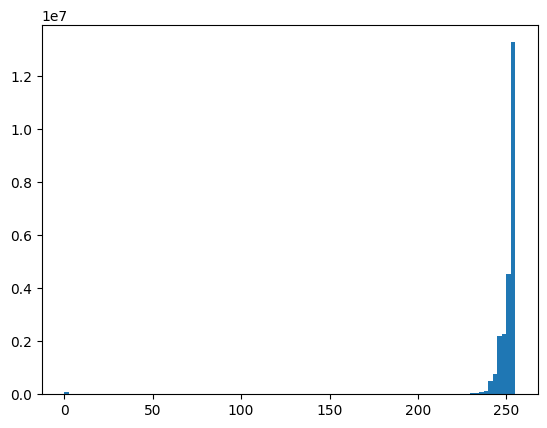

In [53]:
plt.hist(img.flatten(), bins=100)
plt.show()

In [54]:
img[img <= 220] = 0
img[img > 220] = 255

In [55]:
cv2.imwrite("../data/well5gray_thresh.png", img)

True

In [56]:
SKIP_COLORS = [
    255,
    ]

In [57]:
class LineDFS:
    def __init__(self):
        self.moves = [
            (0, 1),
            (0, -1),
            (1, 0),
            (-1, 0),
            ]
        self.src = None
        self.lines = []
        self.line_lengths = []
        self.visited = set()

    def is_similar(self, cell, color, threshold=0.2):
        return abs(cell - color) < threshold * 255

    def dfs(self, r, c, i, color):  
        if (
            r < 0
            or r == self.src.shape[0]
            or c < 0
            or c == self.src.shape[1]
            or not self.is_similar(self.src[r][c], color)
            or self.src[r][c] in SKIP_COLORS
            or (r, c) in self.visited
        ):
            return 0
        
        self.visited.add((r, c))
        self.lines[i].add((r, c))


        return (
            1 + 
            self.dfs(r + 1, c, i, color) + 
            self.dfs(r - 1, c, i, color) + 
            self.dfs(r, c + 1, i, color) + 
            self.dfs(r, c - 1, i, color)
            )

    def find_lines(self, src):
        self.src = src

        for row in range(self.src.shape[0]):
            for col in range(self.src.shape[1]):
                if (
                    not (((row, col) in self.visited) 
                         or (self.src[row][col] in SKIP_COLORS))
                    ):
                    color = self.src[row][col]
                    self.lines.append(set())
                    len_ = self.dfs(row, col, len(self.lines) - 1, color)
                    self.line_lengths.append(len_)

        return self.lines

In [58]:
test = np.ones((10, 10)) * 255
test[5, :] = 0
test[:, 4] = 50


line_dfs = LineDFS()

line_dfs.find_lines(test)

[{(0, 4),
  (1, 4),
  (2, 4),
  (3, 4),
  (4, 4),
  (5, 0),
  (5, 1),
  (5, 2),
  (5, 3),
  (5, 4),
  (5, 5),
  (5, 6),
  (5, 7),
  (5, 8),
  (5, 9),
  (6, 4),
  (7, 4),
  (8, 4),
  (9, 4)}]

In [59]:
len(line_dfs.visited)

19

In [60]:
np.unique(img)

array([  0, 255], dtype=uint8)

In [61]:
line_dfs = LineDFS()

line_dfs.find_lines(img[1500:1700])

[{(0, 781),
  (0, 782),
  (0, 783),
  (1, 781),
  (1, 782),
  (1, 783),
  (2, 781),
  (2, 782),
  (3, 781),
  (3, 782),
  (4, 781),
  (4, 782),
  (5, 781),
  (5, 782),
  (6, 781),
  (6, 782),
  (7, 780),
  (7, 781),
  (7, 782),
  (7, 783),
  (8, 780),
  (8, 781),
  (8, 782),
  (8, 783),
  (9, 781),
  (9, 782),
  (10, 781),
  (10, 782),
  (11, 781),
  (11, 782),
  (12, 781),
  (12, 782),
  (13, 781),
  (13, 782),
  (14, 781),
  (14, 782),
  (15, 781),
  (15, 782),
  (16, 780),
  (16, 781),
  (16, 782),
  (17, 780),
  (17, 781),
  (17, 782),
  (18, 780),
  (18, 781),
  (18, 782),
  (19, 780),
  (19, 781),
  (19, 782),
  (20, 780),
  (20, 781),
  (20, 782),
  (21, 781),
  (21, 782),
  (22, 780),
  (22, 781),
  (22, 782),
  (23, 780),
  (23, 781),
  (23, 782),
  (24, 780),
  (24, 781),
  (24, 782),
  (25, 781),
  (25, 782),
  (26, 781),
  (26, 782),
  (27, 781),
  (27, 782),
  (28, 780),
  (28, 781),
  (28, 782),
  (29, 780),
  (29, 781),
  (29, 782),
  (30, 780),
  (30, 781),
  (30, 782),

In [62]:
len(line_dfs.lines)

31

In [63]:
for line, l in zip(line_dfs.lines, line_dfs.line_lengths):
    if l < 500:
        continue

    for r, c in line:
        img[r + 1500, c] = 255

cv2.imwrite("../data/dfs.png", img)

True